<a href="https://colab.research.google.com/github/nayalafifi/app-test/blob/main/Copy_of_Linear_Regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center>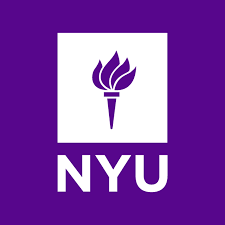</center>

___

## <center>Data Science 4 Everyone 🚀</center>

<center>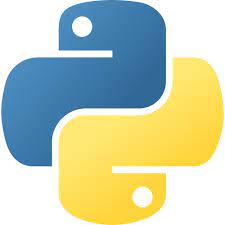</center>

### <center>Session: Linear Regression - Solution </center>

<center>Course provided by:</center>

[<center>Professor Gaëtan Brison</center>](https://github.com/gaetanbrison)
___

# 📈 Linear Regression with Python¶



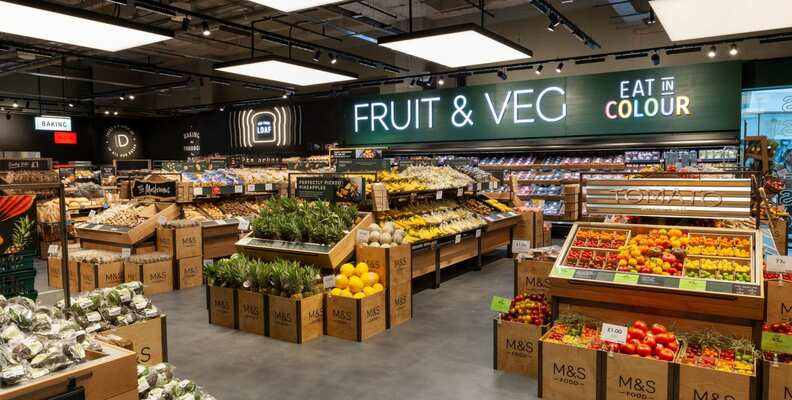

## 💾 Data¶

PREDICT COST ON MEDIA CAMPAIGNS IN FOOD MART OF USA .
ON THE BASIS OF 60K CUSTOMERS INCOME ,PRODUCT,PROMOTION AND STORE FEATURES.
ABOUT FOODMART:

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately 325 stores located in the US. Convenient Food Mart operates on the franchise system.

Food Mart was the nation's third-largest chain of convenience stores as of 1988.

The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.

Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

…KNOW MORE FROM WIKI .

## 📤 Import Libraries

In [2]:
pip install hvplot --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 🔎 Check out the Data

In [4]:
df = pd.read_csv('taylor_swift_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,71,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,72,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,72,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,71,193289


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        530 non-null    int64  
 1   name              530 non-null    object 
 2   album             530 non-null    object 
 3   release_date      530 non-null    object 
 4   track_number      530 non-null    int64  
 5   id                530 non-null    object 
 6   uri               530 non-null    object 
 7   acousticness      530 non-null    float64
 8   danceability      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  valence           530 non-null    float64
 16  popularity        530 non-null    int64  
 1

In [7]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,264.500000,11.184906,0.319247,0.585285,0.574609,0.004005,0.163492,-7.505434,0.055889,122.332311,0.397379,62.766038,239978.624528
std,153.142091,7.981060,0.327043,0.113121,0.191565,0.033163,0.142263,2.939040,0.070300,30.000272,0.199589,15.278448,46119.983031
min,0.000000,1.000000,0.000184,0.243000,0.118000,0.000000,0.035700,-17.932000,0.023100,68.097000,0.037400,32.000000,83253.000000
25%,132.250000,5.000000,0.036250,0.516000,0.443000,0.000000,0.096600,-9.222000,0.030325,96.939500,0.230000,50.000000,211813.000000
50%,264.500000,10.000000,0.165000,0.595500,0.589500,0.000002,0.115000,-7.012000,0.037300,119.030000,0.385500,68.000000,235273.000000
75%,396.750000,15.000000,0.653000,0.653000,0.729750,0.000056,0.163000,-5.361750,0.055225,143.934250,0.535000,74.000000,260361.000000
max,529.000000,46.000000,0.971000,0.897000,0.950000,0.488000,0.931000,-1.909000,0.912000,208.918000,0.943000,99.000000,613026.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

## 📊 Exploratory Data Analysis (EDA)
Let's create some simple plots to check out the data!

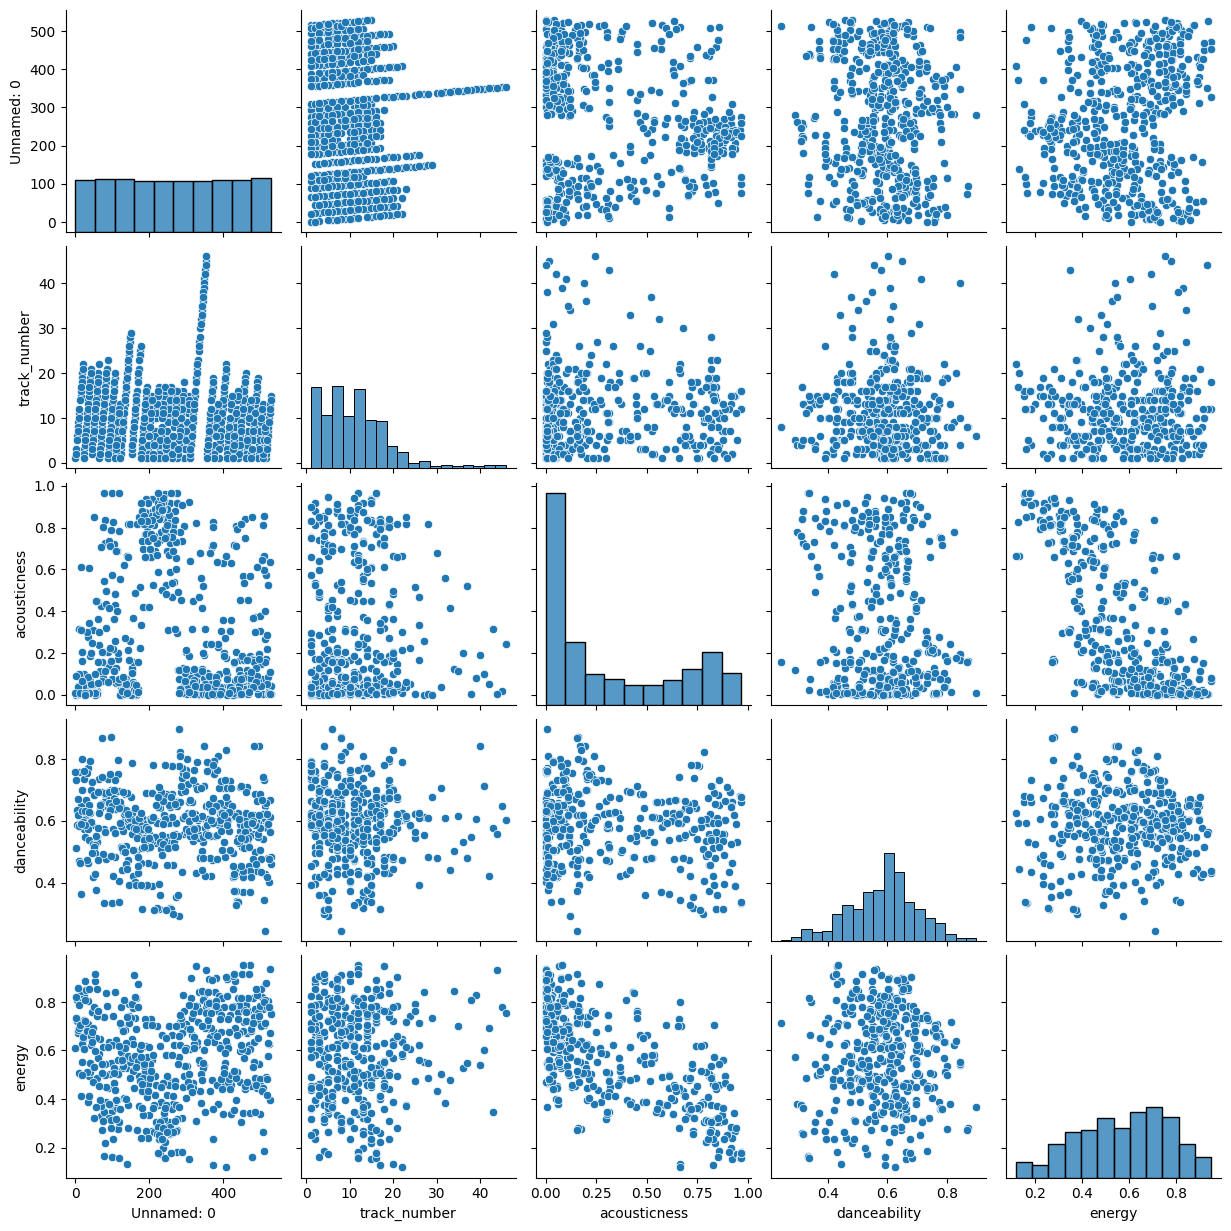

In [12]:
sampled_df = df.sample(n=500)
sampled_df_10_columns = sampled_df.iloc[:, :10]
sns.pairplot(sampled_df_10_columns)

<ipython-input-13-93de2ca8ddf5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['popularity'])


<Axes: xlabel='popularity', ylabel='Density'>

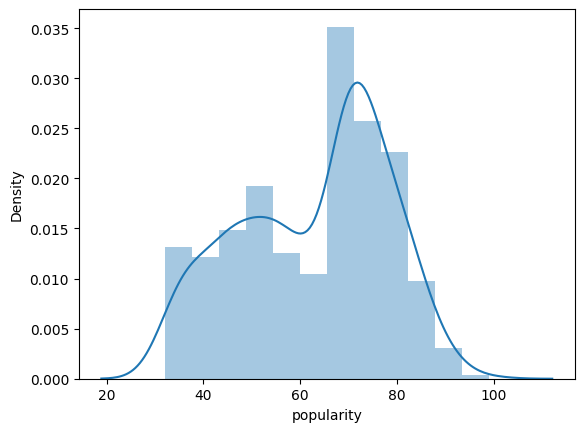

In [13]:
sns.distplot(df['popularity'])

In [14]:
quantitative_df = df.select_dtypes(include=[np.number])

In [15]:
quantitative_df.head(3)

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,71,212600
1,1,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,72,231833
2,2,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000


In [16]:
df_sample_q = quantitative_df.sample(n=500).reset_index(drop=True)

In [17]:
df_sample_q.head(3)

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,79,15,0.8370,0.480,0.220,0.002690,0.116,-12.469,0.0425,82.951,0.0633,67,218502
1,202,9,0.8190,0.537,0.537,0.000904,0.142,-11.266,0.0617,107.895,0.2920,68,275320
2,5,6,0.0121,0.636,0.808,0.000022,0.359,-5.693,0.0729,160.058,0.9170,70,219209


<Axes: >

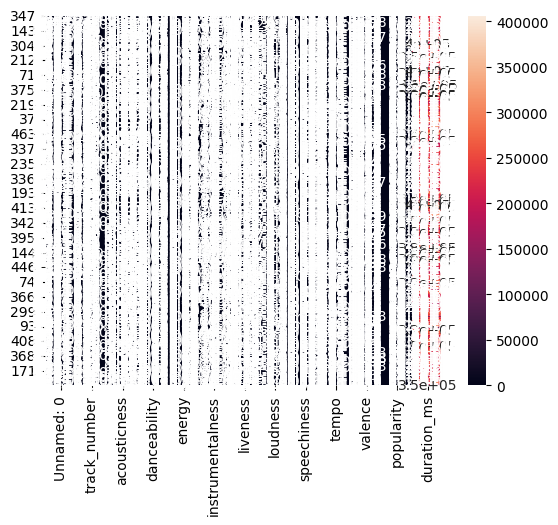

In [18]:
sns.heatmap(df_sample_q.sample(n=500), annot=True)

## 📈 Training a Linear Regression Model
Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [19]:
X = quantitative_df.drop('popularity', axis=1)
y = quantitative_df['popularity']

### 🧱 Train Test Split
Now, let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

Linear Regression

Model Evaluation

In [22]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,-0.067390
track_number,-0.563097
acousticness,3.145725
danceability,-1.498351
energy,7.749213
instrumentalness,-26.096059
liveness,-10.047305
loudness,-0.137434
speechiness,0.697288
tempo,0.001126


In [23]:
X.shape[1]

12

In [24]:
X.columns

Index(['Unnamed: 0', 'track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration_ms'],
      dtype='object')

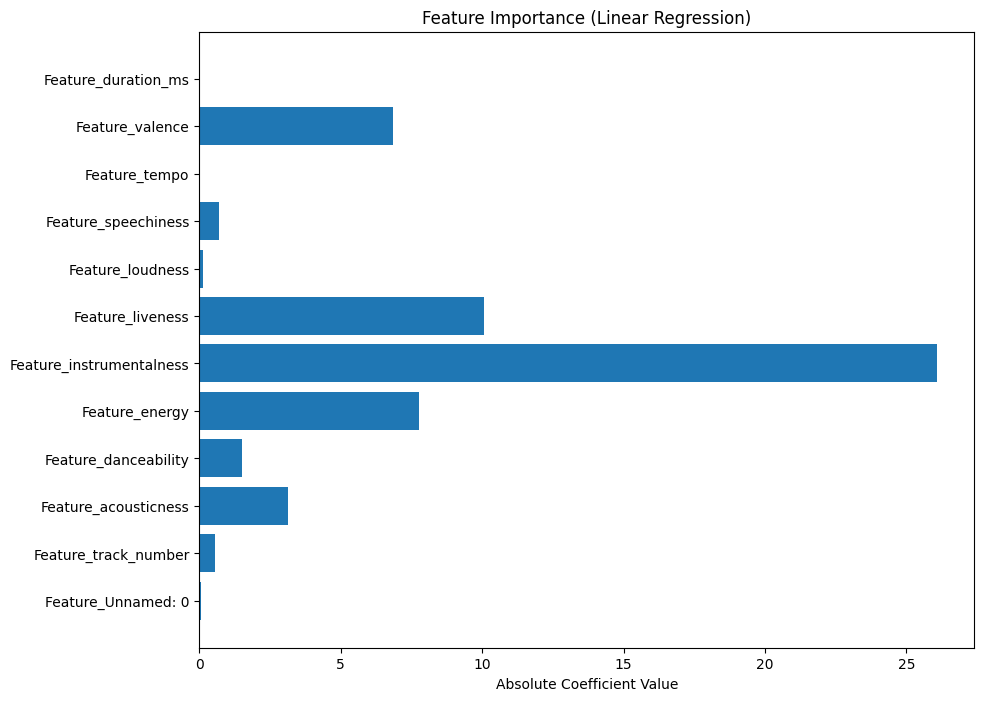

In [25]:
feature_names = [f'Feature_{i}' for i in list(X.columns)]
df_X = pd.DataFrame(X, columns=feature_names)
# Coefficients represent the importance in linear regression
coefficients = lin_reg.coef_

# Making the coefficients positive to compare magnitude
importance = np.abs(coefficients)

# Plotting feature importance with feature names
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Linear Regression)')
plt.show()

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52.

- Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28.

- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67.

- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80.

- Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15.

Does this make sense? Probably not because I made up this data

✔️ Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [26]:
pred = lin_reg.predict(X_test)

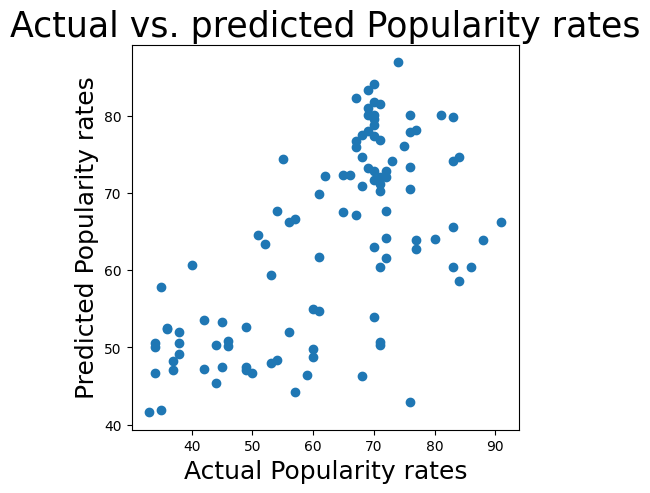

In [28]:
plt.figure(figsize=(5,5))
plt.title("Actual vs. predicted Popularity rates",fontsize=25)
plt.xlabel("Actual Popularity rates",fontsize=18)
plt.ylabel("Predicted Popularity rates", fontsize=18)
plt.scatter(x=y_test,y=pred)


Residual Histogram

### 🛠 Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 9.638338333737746
MSE: 139.10223717892214
RMSE: 11.794161147742646


## Congratulations you made it 🎉